# NeuroMet

Instructions:
* this notebook cannot be used for two different analysis at the same time. If you are unsure if someone is using it click on File / Make a copy and work with the copy.
* to run a cell press Umschalt (Shift) + Enter
* to correctly run the workflow _EVERY_ cell has to be ran
* When you run a cell, there is at first an [*] on the left, then a number (maybe an updated number) when the cell ran.
* normally the only thing to adjust in the settings is 1.6 Subject

### External Modules

In [1]:
import os, glob 
from pipeline.NeuroMet2_dev_fs7 import NeuroMet
from IPython.display import Image
%matplotlib inline

201207-14:21:53,979 nipype.utils WARNING:
	 Could not check for version updates: 
Connection to server could not be made


### Settings

In [2]:
## Paths
raw_data_dir = '/media/drive_s/AG/AG-Floeel-Imaging/00-Rohdaten/02_niftis/NeuroMET2_LauraGöschel/2_Messkohorte'
base_dir = '/media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2'
temp_dir = '/home/WorkFlowTemp/NeuroMet2_fs7'

#Working directory
w_dir = os.path.join(base_dir, 'Structural_Analysis_fs7')


#cores
cores = 6
omp_nthreads = 3

#overwrite copied files?
overwrite = False

**subject_list**:
* to analyze all subjects cut&paste below: `subject_list = [ x.split('/')[-1][8:11] for x in os.listdir(w_dir) if x.startswith('NeuroMet')]`
* to analyse only some subjects use the format: `subject_list = ['subject number', 'subject number' ... ]` i.e.: `subject_list = ['001']` or `subject_list = ['001', '003']` 

In [3]:
subject_list = ['2054T1', '2059T1', '2060T1', '2061T1', '2106T1', '2107T1', '2108T1', '2004T2', '2006T2']

# SPM Segment and Mask generation

In [ ]:
neuromet_creator = NeuroMet(subject_list,
                            temp_dir,
                            w_dir,
                            omp_nthreads,
                            raw_data_dir,
                            overwrite)

### Copy from raw data

In [ ]:
neuromet_creator.copy_from_raw_data()

### Tissue Segmentation Pipeline

In [ ]:
neuromet = neuromet_creator.make_neuromet1_workflow()

In [ ]:
neuromet.write_graph(graph2use = 'colored', dotfilename = './imgs/neuromet')
Image(filename='./imgs/neuromet.png')

In [ ]:
%%time
neuromet.run('MultiProc', plugin_args={'n_procs': cores})

# Combined image and Freesurfer analysis

In [4]:
print(subject_list)

['2054T1', '2059T1', '2060T1', '2061T1', '2106T1', '2107T1', '2108T1', '2004T2', '2006T2']


In [5]:
# Uncomment here for all subjects:
#subject_list = [ x.split('/')[-1][8:11] for x in uni ]

# only some subjects? Then edit here:  
#subject_list = ['2004']

In [9]:
import importlib
from pipeline import NeuroMet2_dev_fs7
importlib.reload(NeuroMet2_dev_fs7)
from pipeline.nodes import qdec
importlib.reload(qdec)

<module 'pipeline.nodes.qdec' from '/media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7/Structural_analysis/pipeline/nodes/qdec.py'>

In [10]:
neuromet_creator = NeuroMet2_dev_fs7.NeuroMet(subject_list,
                                              temp_dir,
                                              w_dir,
                                              omp_nthreads,
                                              raw_data_dir,
                                              overwrite)
neuromet_fs = neuromet_creator.make_neuromet_fs_workflow()

201207-14:24:36,629 nipype.workflow INFO:
	 Generated workflow graph: ./imgs/neuromet_fs.png (graph2use=colored, simple_form=True).


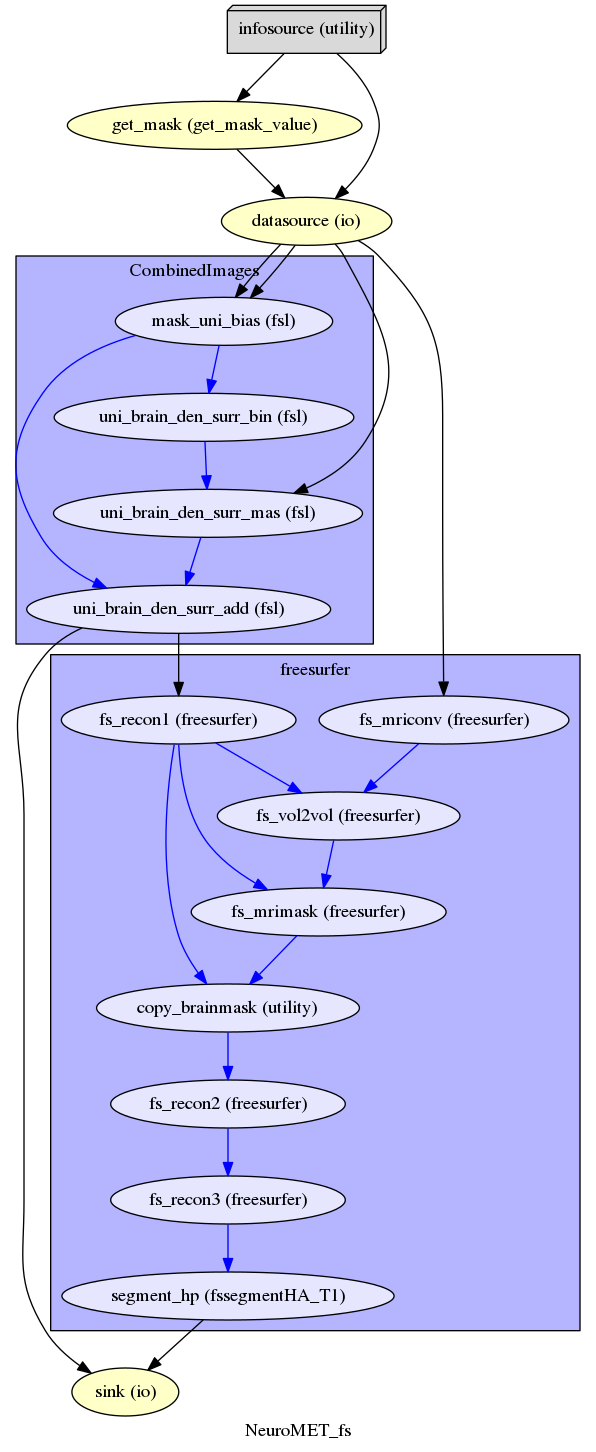

In [11]:
neuromet_fs.write_graph(graph2use = 'colored', dotfilename = './imgs/neuromet_fs')
Image(filename='./imgs/neuromet_fs.png')

### Run Freesurfer Analysis

In [ ]:
%%time
neuromet_fs.run('MultiProc', plugin_args={'n_procs': cores})

In [43]:
# Calculate and Ajust Volumes

In [1]:
from pipeline.nodes import adj_vol, qdec

201228-16:57:10,420 nipype.utils WARNING:
	 Could not check for version updates: 
Connection to server could not be made


In [92]:
import importlib
importlib.reload(qdec)

<module 'pipeline.nodes.qdec' from '/media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7/Structural_analysis/pipeline/nodes/qdec.py'>

In [2]:
q = qdec.QDec()

In [3]:
q.inputs.basedir = '/media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7'

In [4]:
q.run().outputs.stats_directory

'/media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7/stats_tables'

In [97]:
import importlib
importlib.reload(adj_vol)

<module 'pipeline.nodes.adj_vol' from '/media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7/Structural_analysis/pipeline/nodes/adj_vol.py'>

In [98]:
v = adj_vol.AdjustVolume()

In [ ]:
v.inputs.stats_directory = '/media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7/stats_tables'
v.inputs.diag_csv = 